# Practicum: Regularized Logistic Regression and ROC

## Part 1: Data Exploration: Graduate School Admissions

The data we will be using is admission data on Grad school acceptances.

* `admit`: whether or not the applicant was admitted to grad school
* `gpa`: undergraduate GPA
* `GRE`: score of GRE test
* `rank`: prestige of undergraduate school (1 is highest prestige)

We will use the GPA, GRE, and rank of the applicants to try to predict whether or not they will be accepted into graduate school.

Before we get to predictions, we should do some data exploration.

**1)** Load the dataset into pandas: `data/grad.csv`.  


**2)** Use the pandas `describe` method to get some preliminary summary statistics on the data. In particular look at the mean values of the features.  


**3)** Use the pandas `crosstab` method to see how many applicants from each rank of school were accepted. You should get a dataframe that looks like this:

    ```
    rank    1   2   3   4
    admit
    0      28  ..  ..  ..
    1      33  ..  ..  ..
    ```


**4)** Make a bar plot of the percent of applicants from each rank who were accepted. You can do `.plot(kind="bar")` on a pandas dataframe.  
    

**5)** What does the distribution of the GPA and GRE scores look like? Do the distributions differ much?

    Hint: Use the pandas `hist` method.  
    

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series 
%matplotlib inline

In [2]:
data = pd.read_csv('grad.csv')
grad = pd.DataFrame(data)

grad.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [3]:
ct = pd.crosstab(index=grad['admit'], columns=grad['rank'])
ct

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


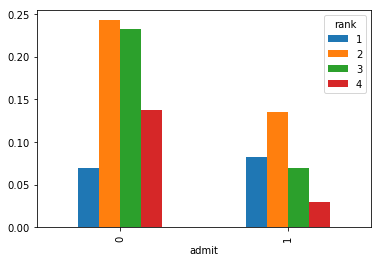

In [4]:
ct = pd.crosstab(index=grad['admit'],normalize=True, columns=grad['rank'])
ct.plot(kind="bar");

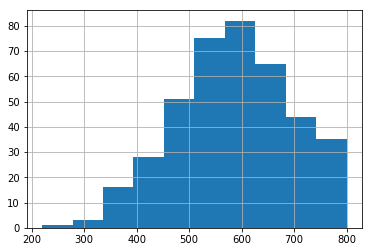

In [5]:
grad["gre"].hist()

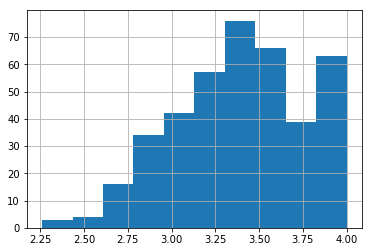

In [6]:
grad["gpa"].hist()

## Part 2: Regularized Logistic Regression

Now we're ready to try to fit our data with Regularized Logistic Regression.  

In this part, we will use the gradient descent algorithm to estimate the logistic regression coefficients. 

The hypothesis function of the logistic regression is defined as, 

$$ h(x_i) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3})}} $$


**1)** In `code/regularized_logistic_regression.py`, implement `hypothesis` and `predict` functions. `hypothesis` will calculate the value of the hypothesis function for the given coefficients. (Remember to add a column of 1's to the feature meatrix.) This returns float values between 0 and 1. `predict` will round these values so that you get a prediction of either 0 or 1. You can assume that the threshold we're using is 0.5.  

The cost function without regularization is given by  

$$ J(\beta) = - \frac{1}{n} \sum_{i = 1}^{n} \left[ y_i log(h(x_i)) + (1 - y_i) log(1 - h(x_i)) \right] $$  

With Ridge regularization, the cost function becomes  

$$ J(\beta) = - \frac{1}{n} \sum_{i = 1}^{n} \left[ y_i log(h(x_i)) + (1 - y_i) log(1 - h(x_i)) \right] + \frac{\lambda}{2n} \sum_{j = 1}^{p} \beta_j^2$$  

**2)** In `regularized_logistic_regression.py`, implement `cost_function` (without regularization) and `cost_regularized` (with regularization) functions. You should be able to use the `hypothesis` function you implemented above.  


The gradient of the cost function without regularization is given by  

$$ \frac{\partial}{\partial \beta_j} J(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( h(x_i) - y_i \right) x_{ij}$$  

where $j = 0, 1, 2, 3$ and $x_{i0} = 1$ for all $i$ (the column of 1's in the feature matrix).  


With regularization, the gradient is  

$$ \frac{\partial}{\partial \beta_0} J(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( h(x_i) - y_i \right) \text{ when } j = 0$$  

and  

$$ \frac{\partial}{\partial \beta_j} J(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( h(x_i) - y_i \right) x_{ij} + \frac{\lambda}{n} \beta_j \text{ for } j = 1, 2, 3$$



**3)** In `regularized_logistic_regression.py`, implement `cost_gradient` (without regularization) and `gradient_regularized` (with regularization) functions. 


Now we are going to implement gradient descent. Below is psuedocode for the gradient descent algorithm. In this pseudocode and in our implementation, we will stop after a given number of iterations. Another valid approach is to stop once the incremental improvement in the optimization function (the cost function) is sufficiently small.

    Gradient Descent:
        input: J: optimization function (cost function)
               alpha: learning rate
               n: number of iterations
        output: local minimum of optimization function J

        initialize b (often as all 0's)
        repeat for n iterations:
            update b as b - alpha * gradient(J)

You are going to be completing the code stub in `gradient_descent.py`.

**4)** Start by taking a look at the starter code. Note how the `GradientDescent` object is initialized. It takes a cost function and a gradient function. We will pass it the functions that we wrote above. Here

**5)** Implement the `run` method. Follow the pseudocode from above.  


**6)** Implement the `predict` method. It should just call the `predict` function that was taken as a parameter.  


**7)** Run your version of gradient descent on the admission data.

    **Note:** If you're having trouble getting it to converge, run it for just
    a few iterations and print out the cost at each iteration. The value should
    be going down. If it isn't, you might need to decrease your learning rate.
    And of course check your implementation to make sure it's correct. You can
    also try printing out the cost every 100 iterations if you want to run it
    longer and not get an insane amount of printing.



## Part 3: ROC Curve 

One of the best ways to evaluate how a classifier performs is an ROC curve. (http://en.wikipedia.org/wiki/Receiver_operating_characteristic) 

![](images/roc_curve.png)

To understand what is actually happening with an ROC curve, we can create one ourselves.  Here is pseudocode to plot it.

The `probabilities` are the predicted probabilities in (0,1) returned from Logistic Regression. The standard default threshold is 0.5 where 
0-0.5 values are interpreted as the negative class ($y = 0$) and 0.5-1 values are predicted as the positive class ($y = 1$).

The `labels` are the true/observed values of $y$.

```
function ROC_curve(probabilities, labels):
    Sort instances by their prediction strength (the probabilities)
    For every instance in increasing order of probability:
        Set the threshold to be the probability
        Set everything above the threshold to the positive class
        Calculate the True Positive Rate (aka sensitivity or recall)
        Calculate the False Positive Rate (1 - specificity)
    Return three lists: TPRs, FPRs, thresholds
```

Recall that the *true positive rate* is

```
 number of true positives     number correctly predicted positive
-------------------------- = -------------------------------------
 number of positive cases           number of positive cases
```

and the *false positive rate* is

```
 number of false positives     number incorrectly predicted positive
--------------------------- = ---------------------------------------
  number of negative cases           number of negative cases
```

You're going to be implementing the `roc_curve` function.

Here's some example code that you should be able to use to plot the ROC curve with your function. This uses a fake dataset.

```python
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()
```

**1)** Write an ROC curve function to compute the above in `roc_curve.py`.

    It should take as input the predicted probabilities and the true labels.

In [7]:
from roc_curve11 import roc_curve

**2)** Run the above code to verify that it's working correctly. You can also validate your correctness against [scikit-learns built-in function](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

/Users/ashleighdiamond/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


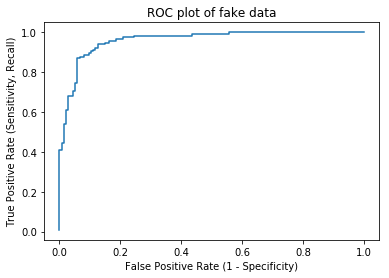

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()

**3)** Make a plot of the ROC curve for the regularized logistic regression model from Part 2.  

**4)** Is it possible to pick a threshold where TPR > 60% and FPR < 40%? What is the threshold?

yes according to my graph it appears so, I did not use the data from my code for logestic regression because it was not correct.

    Note that even if it appears to be in the middle of the graph it doesn't make the threshold 0.5.

**5)** Say we are using this as a first step in the admission process. We want to weed out clearly unqualified candidates, but not reject too many candidates. What might be a good choice of threshold?

We would want one that gives us a higher true positive rate and a lower false positive rate. However this depends on what my roc curve will actually like. But with admissions you do not want a lot of false positives. 

    There isn't a single correct answer, so explain your choice.